In [1]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math

In [8]:
class RandomWalk:
    def __init__(self, time, interval, omega=2*math.pi):
        self.t = np.arange(time) #run time array
        self.interval = interval #random walk time between times
        self.omega = omega 
        self.x = np.zeros(time, dtype=int)
        self.y = np.zeros(time, dtype=int)
        self.vx = np.zeros(time-1, dtype=int)
        self.vy = np.zeros(time-1, dtype=int)
        #initial condition
        self.x[1] = 1
        self.y[1] = 1
        self.vx[0] = 1
        self.vy[0] = 1

    #randomwalk to get the x,y trajectory
    def runprocess(self):
        for i in self.t[2:]:
            for j in range(self.interval):
                t = self.t[i] + j/self.interval

                if random.uniform(0,1)<(1+math.sin(self.omega*t))/2:
                    self.x[i] += 1
                else:
                    self.x[i] -= 1
                
                if random.uniform(0,1)<0.5:
                    self.y[i] += 1
                else:
                    self.y[i] -= 1

    #calculate velocity using the trajectory
    def vt_Cal(self):
        for j in self.t[1:-2]:
            self.vx[j] = (self.x[j-1]+self.x[j+1])/2
            self.vy[j] = (self.y[j-1]+self.y[j+1])/2
        return self.vx, self.vy


In [61]:
time = 100
num_iter = 1000
v = np.zeros(time-1)

#repeat to derive average
for n in range(num_iter):
    monte = RandomWalk(time, 5, omega=20*math.pi)
    monte.runprocess()
    vx, vy = monte.vt_Cal()
    v += vx+vy

v = v/(num_iter)
print(v)

[ 2.     0.002  1.022 -0.029  0.047 -0.005  0.157 -0.048  0.199 -0.061
  0.099  0.027  0.018  0.059 -0.036  0.034 -0.054  0.091  0.044  0.03
  0.06  -0.109  0.018 -0.035 -0.017 -0.02  -0.01  -0.048  0.011 -0.006
 -0.036  0.02  -0.025  0.018 -0.099 -0.034 -0.148 -0.023 -0.014 -0.008
  0.055 -0.033 -0.009  0.064 -0.023  0.014 -0.054 -0.131 -0.082 -0.022
 -0.152 -0.016 -0.123 -0.106  0.123 -0.004  0.171  0.067  0.109  0.118
  0.065  0.012 -0.055 -0.071 -0.041 -0.013  0.078 -0.01   0.073  0.043
 -0.026  0.106 -0.087  0.027 -0.062  0.019  0.032 -0.018  0.102 -0.139
  0.081 -0.074 -0.017 -0.102 -0.015 -0.063 -0.041  0.106 -0.049  0.059
  0.124 -0.122  0.134 -0.11   0.056  0.075  0.019  0.123  0.   ]


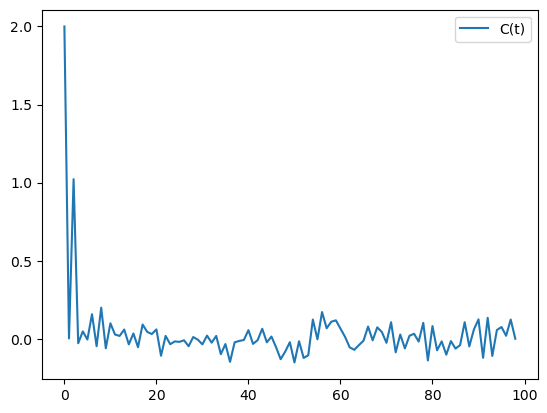

In [62]:
x = np.arange(time-1)
plt.plot(x, v, label='C(t)')

plt.legend()
plt.show()